In [10]:
!pip install folium
!pip install geopy


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\ifc04\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\ifc04\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
#read galician_musicxml_located.csv from paretn folder
#path='../galician_musicxml_located.csv'
path='data_located.csv'
df = pd.read_csv(path,quotechar='"',skipinitialspace=True)

#df = pd.read_csv('galician_musicxml_full.csv',quotechar='"',skipinitialspace=True)

#drop first column
#name first column id
df = df.rename(columns={'Unnamed: 0': 'id'})
df

,id,name,parroquia,concellu,province,key,time_signature,ratio_negras_corcheas
0,1,Detrás das airas,NaN,As Airas,Ourense,C major,6/8,0.246575
1,2,Muiñeira de Quindous,Quindous,Cervantes,Lugo,C major,6/8,0.312500
2,3,Muiñeira de Quindous,Quindous,Cervantes,Lugo,C major,6/8,0.307692
3,5,Muiñeira de Monforte,NaN,Monforte,Lugo,C major,6/8,0.240000
4,6,Muiñeira de Ventosa,NaN,Ventosa,Pontevedra,C major,6/8,0.160000
...,...,...,...,...,...,...,...,...
255,446,Ribeirana de Pontevedra,NaN,Pontevedra,Pontevedra,C major,6/8,0.388889
256,449,Carballesa do Incio,NaN,O Incio,Lugo,C major,2/4,0.126984
257,450,Muiñeira de Vilarmide,Vilarmide,A Pontenova,Lugo,C major,6/8,0.092025
258,452,Danza Anterga de Lugo,NaN,Lugo,Lugo,C major,2/4,0.181818


In [12]:
#Coordenadas
#"Lugo, A Fonsagrada"
def get_coordinates(place):
    geolocator = Nominatim(user_agent="galician_music")
    location = geolocator.geocode(place)
    if location is None:
        return 0, 0
    return location.latitude, location.longitude

print(get_coordinates("Laxe, A Coruña"))

(43.2218866, -9.0059491)


In [13]:
#Iterate through dataframe and print concellu, provincia and parroquias
#import sleep
from time import sleep
for index, row in df.iterrows():
    concellu=row['concellu']
    parroquia=row['parroquia']
    provincia=row['province']
    #Concat strings
    place = str(parroquia) + ", " +str(concellu) + ", " + str(provincia)
    #if any value is NaN or nan strip and keep only the right part
    if pd.isnull(parroquia):
        place = str(concellu) + ", " + str(provincia)
    if pd.isnull(concellu):
        place = provincia
    #if it has nan or Null in province, keep parroquia and concellu
    if pd.isnull(provincia):
        place = str(parroquia) + ", " +str(concellu)
    #if all is nan skip
    if pd.isnull(parroquia) and pd.isnull(concellu) and pd.isnull(provincia):
        continue
    #if place contains nan add
    if not "nan" in place:
        df.loc[index,'location'] = place
    
#drop parroquia
df = df.drop(columns=['parroquia'])
#drop concellu
df = df.drop(columns=['concellu'])
#drop province
df = df.drop(columns=['province'])

    
df
#Print location
#drop nan values
df = df.dropna(subset=['location'])
#Iterate through dataframe and get coordinates
for index, row in df.iterrows():
    
    #coordinates
    lat, lon = get_coordinates(row['location'])
    if lat == 0 and lon == 0:
        print("oops nun lo encontré", row['location'])
        #try getting locatios without parroquia, split string and get middle and last part
        place = row['location'].split(", ")
        place=place[1]+", "+place[2]
        lat, lon = get_coordinates(place)
        print("trying again", lat , lon)
        
        if lat == 0 and lon == 0:
            sleep(1)
            print(place,"still not working")
            place=place.split(", ")
            place=place[1]
            lat, lon = get_coordinates(place)
            print("trying for the last time", lat , lon)
    #add coordinates to dataframe
    df.loc[index,'lat'] = lat
    df.loc[index,'lon'] = lon
    


    




    

oops nun lo encontré Montrove, Cambre, A Coruña
trying again 43.2803751 -8.3297129
oops nun lo encontré Sendelle, Biomorto, A Coruña
trying again 0 0
Biomorto, A Coruña still not working
trying for the last time 43.3709703 -8.3959425
oops nun lo encontré Borreiro, Abegondo, A Coruña
trying again 43.2104427 -8.2903237
oops nun lo encontré Borreiro, Abegondo, A Coruña
trying again 43.2104427 -8.2903237
oops nun lo encontré Lema, Baldaio, A Coruña
trying again 43.1450259 -8.5763411
oops nun lo encontré Grixalba, Sobrado dos Monxes, A Coruña
trying again 43.0404996 -8.02238
oops nun lo encontré Pobra de Burón, A Fonsagrada, Lugo
trying again 43.1248311 -7.0676605
oops nun lo encontré Pacios de Mourisco, A Fonsagrada, Lugo
trying again 43.1248311 -7.0676605
oops nun lo encontré Santo Estevo de Piadela, Betanzos, A Coruña
trying again 43.2729197 -8.2218227
oops nun lo encontré Santiso, Vila de Cruces, Pontevedra
trying again 42.7937228 -8.1699391
oops nun lo encontré Entreambasaugas, Guntín 

In [19]:
df

,id,name,key,time_signature,ratio_negras_corcheas,location,lat,lon
0,1,Detrás das airas,C major,6/8,0.246575,"As Airas, Ourense",42.307445,-7.901821
1,2,Muiñeira de Quindous,C major,6/8,0.312500,"Quindous, Cervantes, Lugo",42.855641,-6.995793
2,3,Muiñeira de Quindous,C major,6/8,0.307692,"Quindous, Cervantes, Lugo",42.855641,-6.995793
3,5,Muiñeira de Monforte,C major,6/8,0.240000,"Monforte, Lugo",42.523669,-7.509695
4,6,Muiñeira de Ventosa,C major,6/8,0.160000,"Ventosa, Pontevedra",42.736696,-7.976170
...,...,...,...,...,...,...,...,...
255,446,Ribeirana de Pontevedra,C major,6/8,0.388889,"Pontevedra, Pontevedra",42.431888,-8.643159
256,449,Carballesa do Incio,C major,2/4,0.126984,"O Incio, Lugo",42.666400,-7.363224
257,450,Muiñeira de Vilarmide,C major,6/8,0.092025,"Vilarmide, A Pontenova, Lugo",43.278925,-7.191350
258,452,Danza Anterga de Lugo,C major,2/4,0.181818,"Lugo, Lugo",43.011844,-7.556575


In [20]:


# Create a map object centered on Galicia
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #Add marker to mapm if row
    folium.Marker([lat, lon], popup=row['name']).add_to(m)
    #Add red marker


# Display the map
m


In [21]:
# MAPA CON LAS MUIÑEIRAS CON UN RITMO DIFERENTE A 6/8
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #Add marker to mapm if row time signature is 6/8 make it red
    if not row['time_signature'] == '6/8':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='red')).add_to(m)
    
    #Add red marker


# Display the map
m


In [50]:
# Create a map object centered on Galicia
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #Depending on how close the ratio_corcheas_negras is between 0.005 and 0.15 make it light green
    if row['ratio_negras_corcheas'] >= 0.000 and row['ratio_negras_corcheas'] < 0.1265:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='green')).add_to(m)
    #If it is between 0.15 and 0.3 make it green
    if row['ratio_negras_corcheas'] > 0.1265 and row['ratio_negras_corcheas'] < 0.3:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='darkgreen')).add_to(m)

    if row['ratio_negras_corcheas'] >= 0.3 and row['ratio_negras_corcheas'] < 0.55:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='purple')).add_to(m)
    if row['ratio_negras_corcheas'] >= 0.55:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='orange')).add_to(m)
    
    
    #Add red marker


# Display the map
m

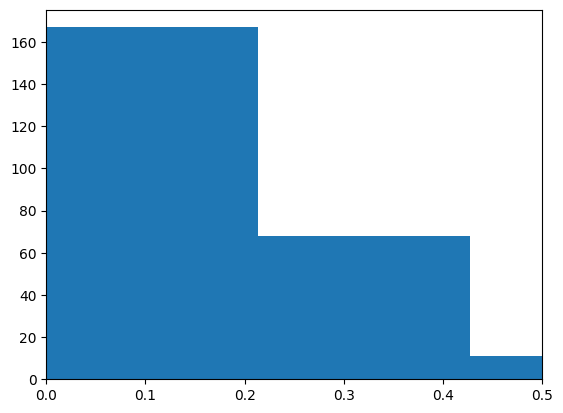

In [27]:
#Iterate through dataframe and print all the ratio_negras_corcheas
#import plot thingy
import matplotlib.pyplot as plt 
list=[]
for index, row in df.iterrows():
    #print(row['ratio_negras_corcheas'])
    list.append(row['ratio_negras_corcheas'])

    #make me a histogram of the ratio_negras_corcheas
plt.hist(list, bins=10)
#show all values between 0 and 0.5 more detailed



0.1265


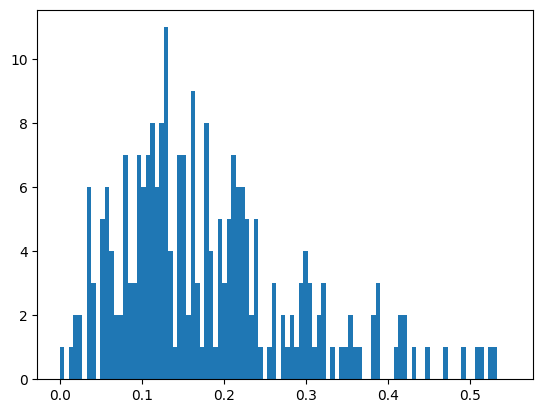

In [44]:
import numpy as np
h=plt.hist(list, bins=100, range=(0, 0.55))
#get x from histogram
x=h[1]
#get index where y is maximum
index = np.argmax(h[0])
#get x in that index
print(x[index])

In [47]:
#get row where ratio_negras_corcheas is more than 0.12 and less than 0.13, also get the second one that
#it founds

df[(df['ratio_negras_corcheas'] > 0.12) & (df['ratio_negras_corcheas'] < 0.13)]
#print name
print(df.loc[0,'name'])

#and now one that has more than 0.15 and less than 0.20
df[(df['ratio_negras_corcheas'] > 0.15) & (df['ratio_negras_corcheas'] < 0.20)]
#print name
print(df.loc[1,'name'])

Detrás das airas
Muiñeira de Quindous
